In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from env import host, user, password
from pydataset import data



db_name = "employees"

In [2]:
url = f"mysql+pymysql://{user}:{password}@{host}/{db_name}"


In [3]:
df = pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

In [4]:
df

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


    1. Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:



    d. Do automatic or manual cars have better miles per gallon?

In [5]:
mpg = data("mpg")

In [6]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




    a. On average, which manufacturer has the best miles per gallon?
    
    average_miles_per_gallon_per_mfg

In [7]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [8]:
mpg["hwy_cty_total"] = mpg.cty + mpg.hwy

In [9]:
mpg.groupby("manufacturer").hwy_cty_total.mean().sort_values(ascending = False).head(1)

manufacturer
honda    57.0
Name: hwy_cty_total, dtype: float64

    b. How many different manufacturers are there?

In [10]:
len(mpg.manufacturer.unique())

15

    c. How many different models are there?

In [11]:
len(mpg.model.unique())

38

    d. Do automatic or manual cars have better miles per gallon?

In [12]:
mpg.groupby("trans").hwy_cty_total.mean()

trans
auto(av)      47.800000
auto(l3)      48.000000
auto(l4)      37.903614
auto(l5)      35.435897
auto(l6)      33.666667
auto(s4)      44.333333
auto(s5)      42.666667
auto(s6)      42.562500
manual(m5)    45.551724
manual(m6)    41.105263
Name: hwy_cty_total, dtype: float64

    2. Joining and Merging

    Copy the users and roles dataframes from the examples above. What do you think a right join would look like? An outer join? What happens if you drop the foreign keys from the dataframes and try to merge them?

In [13]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [14]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [15]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='right')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [16]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='left')

,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,3.0,3.0,reviewer
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


In [17]:
pd.merge(users, roles, left_on="role_id", right_on="id", how="inner" )

,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1,admin
1,2,joe,2.0,2,author
2,3,sally,3.0,3,reviewer
3,4,adam,3.0,3,reviewer


In [18]:
pd.merge(users, roles, left_on="role_id", right_on="id", how="outer")

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


    3. Getting data from SQL databases

    d. Read the employees and titles tables into two separate dataframes

In [19]:
employees = pd.read_sql('SELECT * FROM employees LIMIT 50', url)

In [20]:
titles = pd.read_sql("SELECT * FROM titles LIMIT 50", url)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


    e. Visualize the number of employees with each title.

In [21]:
titles.title.unique()

array(['Senior Engineer', 'Staff', 'Engineer', 'Senior Staff',
       'Assistant Engineer', 'Technique Leader'], dtype=object)

In [22]:
titles.groupby("title").count()

,emp_no,from_date,to_date
title,,,
Assistant Engineer,3,3,3
Engineer,17,17,17
Senior Engineer,14,14,14
Senior Staff,5,5,5
Staff,8,8,8
Technique Leader,3,3,3


In [23]:
titles["title"].unique()

array(['Senior Engineer', 'Staff', 'Engineer', 'Senior Staff',
       'Assistant Engineer', 'Technique Leader'], dtype=object)

In [24]:
pd.DataFrame(titles.groupby("title").count())

,emp_no,from_date,to_date
title,,,
Assistant Engineer,3,3,3
Engineer,17,17,17
Senior Engineer,14,14,14
Senior Staff,5,5,5
Staff,8,8,8
Technique Leader,3,3,3


In [25]:
titles_with_all_employee_count = titles["title"].value_counts()

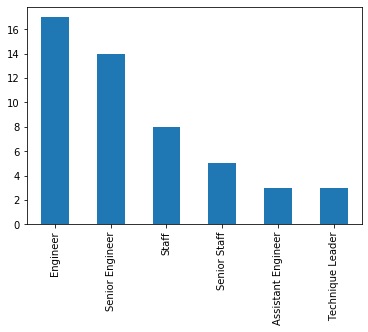

In [26]:
titles_with_all_employee_count.plot.bar()

    f. Join the employees and titles dataframes together.

In [27]:
emp_with_titles = pd.merge(titles, employees)

In [28]:
emp_with_titles

,emp_no,title,from_date,to_date,birth_date,first_name,last_name,gender,hire_date
0,10001,Senior Engineer,1986-06-26,9999-01-01,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,Staff,1996-08-03,9999-01-01,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,Senior Engineer,1995-12-03,9999-01-01,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,Engineer,1986-12-01,1995-12-01,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01,1954-05-01,Chirstian,Koblick,M,1986-12-01
5,10005,Senior Staff,1996-09-12,9999-01-01,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
6,10005,Staff,1989-09-12,1996-09-12,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
7,10006,Senior Engineer,1990-08-05,9999-01-01,1953-04-20,Anneke,Preusig,F,1989-06-02
8,10007,Senior Staff,1996-02-11,9999-01-01,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
9,10007,Staff,1989-02-10,1996-02-11,1957-05-23,Tzvetan,Zielinski,F,1989-02-10


    g. Visualize how frequently employees change titles.

In [29]:
change_frequency = emp_with_titles.groupby("emp_no").title.count() -1

In [30]:
change_frequency

emp_no
10001    0
10002    0
10003    0
10004    1
10005    1
10006    0
10007    1
10008    0
10009    2
10010    0
10011    0
10012    1
10013    0
10014    0
10015    0
10016    0
10017    1
10018    1
10019    0
10020    0
10021    0
10022    0
10023    0
10024    0
10025    0
10026    1
10027    1
10028    0
10029    1
10030    1
10031    1
10032    1
10033    0
10034    0
10035    1
Name: title, dtype: int64

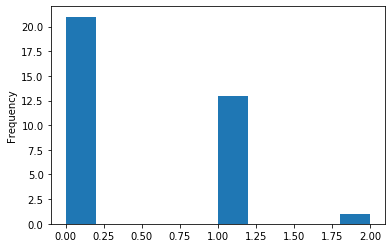

In [31]:
change_frequency.plot.hist()

In [32]:
frequency_change = pd.crosstab(emp_with_titles.emp_no, emp_with_titles.title)

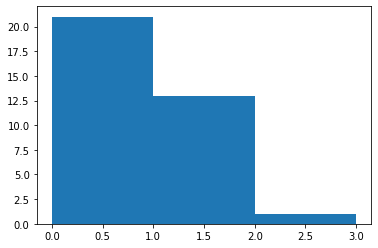

In [33]:
plt.hist(change_frequency, bins=[0, 1, 2, 3])
plt.show()

    h. For each title, find the hire date of the employee that was hired most recently with that title.

In [34]:
emp_with_titles.groupby(["title"]).agg({"hire_date": "max"})

,hire_date
title,
Assistant Engineer,1997-05-19
Engineer,1995-08-22
Senior Engineer,1995-03-20
Senior Staff,1993-08-03
Staff,1999-04-30
Technique Leader,1988-02-10


    i. Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

In [35]:
tiltes_and_departments = pd.read_sql('SELECT title, dept_name FROM titles JOIN employees_with_departments USING (emp_no)', url)

In [36]:
tiltes_and_departments.groupby("dept_name").title.count()

dept_name
Customer Service       35075
Development           125586
Finance                26070
Human Resources        26618
Marketing              30138
Production            107608
Quality Management     29346
Research               31461
Sales                  78001
Name: title, dtype: int64

In [37]:
pd.crosstab(tiltes_and_departments.dept_name, tiltes_and_departments.title)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309
Development,7769,58135,2,49326,1247,1424,7683
Finance,0,0,2,0,12139,13929,0
Human Resources,0,0,2,0,12274,14342,0
Marketing,0,0,2,0,13940,16196,0
Production,6445,49649,4,42205,1270,1478,6557
Quality Management,1831,13852,4,11864,0,0,1795
Research,378,2986,2,2570,11637,13495,393
Sales,0,0,2,0,36191,41808,0


    4. Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

In [38]:
db_name = "chipotle"
url = f"mysql+pymysql://{user}:{password}@{host}/{db_name}"

In [39]:
chipotle_db = pd.read_sql('SELECT * FROM orders', url)

    a. What is the total price for each order?

In [40]:
chipotle_db.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [41]:
chipotle_db.item_price = chipotle_db.item_price.str.replace("$","")

In [42]:
chipotle_db

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",8.75


In [46]:
chipotle_db["item_total"] = chipotle_db.quantity.astype(float) * chipotle_db.item_price.astype(float)

In [48]:
chipotle_db.head()

,id,order_id,quantity,item_name,choice_description,item_price,item_total
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39,2.39
1,2,1,1,Izze,[Clementine],3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98,33.96


In [49]:
chipotle_db.groupby("order_id").item_total.sum()

order_id
1       11.56
2       33.96
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_total, Length: 1834, dtype: float64

    b. What are the most popular 3 items?

In [54]:
chipotle_db.groupby("item_name").quantity.count().sort_values(ascending = False).head(3)

item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Name: quantity, dtype: int64

c. Which item has produced the most revenue?

In [57]:
chipotle_db.groupby("item_name").item_total.sum().sort_values(ascending = False).head(1)

item_name
Chicken Bowl    8044.63
Name: item_total, dtype: float64